## Infinite Overlapping Mixture Model with Binary clusters

In [1]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [151]:
#Generate synthetic data
K=5
N=10
D=8
N_iter=5
alpha_prior = 2

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [152]:
Z

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [153]:
X

array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.]])

In [154]:
theta

array([[  5.31089647e-03,   1.76374851e-02,   1.82924057e-01,
          8.29794974e-02,   6.39685323e-04,   4.04274160e-01,
          8.42727874e-04,   1.12373013e-06],
       [  2.29584614e-01,   3.18054689e-01,   1.52281326e-02,
          2.34947024e-02,   4.12911536e-01,   7.95115278e-01,
          2.04395381e-02,   2.63066249e-01],
       [  3.57025709e-01,   1.30875986e-01,   2.17789667e-01,
          8.04116992e-01,   4.51488995e-02,   4.82000507e-03,
          4.71435478e-02,   4.13114322e-01],
       [  7.01527379e-01,   5.19585367e-03,   1.88174564e-01,
          4.30086488e-02,   7.76796660e-02,   5.38575912e-01,
          2.64734240e-01,   7.22979685e-01],
       [  3.03001195e-02,   1.23610680e-01,   5.93220731e-03,
          1.88187902e-01,   1.37010175e-01,   9.08674628e-01,
          2.68929582e-01,   6.55083313e-01]])

#### IOMM algorithm

In [155]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 10,
                 copy_rows = 4)

norm_lh[ 0 ] =  8.00000000072
norm_lh[ 1 ] =  4.38079726251
norm_lh[ 2 ] =  8.45054181591
norm_lh[ 3 ] =  9.01618130556
norm_lh[ 4 ] =  7.05001207182
norm_lh = 8.00000000072


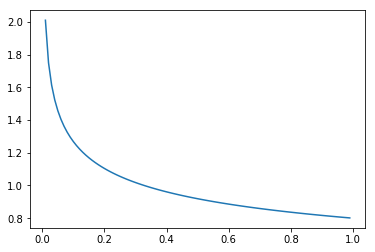

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
plt.plot(np.arange(0,1,0.01),beta.pdf(np.arange(0,1,0.01),4/K,1))
plt.show()

In [157]:
Z_hat = IOMM.learning(apply_log=False)

iteration n° 0
i = 4
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 8.1317667098e-07
k= 1
proba Z=1: 0.0202265530165
k= 2
proba Z=1: 5.06220780612e-06
proba Z=1: 0.0
k= 4
proba Z=1: 0.000548141751195
_________2.propose adding new clusters________
i = 5
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 8.99118249328e-12
k= 1
proba Z=1: 0.00941502381759
k= 2
proba Z=1: 0.000416043047946
proba Z=1: 0.0
k= 4
proba Z=1: 0.00376911586962
_________2.propose adding new clusters________
i = 6
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 7.49985730671e-11
k= 1
proba Z=1: 0.00398919977538
k= 2
proba Z=1: 0.00488576568571
proba Z=1: 0.0
k= 4
proba Z=1: 0.000741821373968
_________2.propose adding new clusters________
i = 7
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 0.00279845554853
k= 1
proba Z=1: 0.000579885546495

/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:192: RuntimeWarning: divide by zero encountered in log
  log_theta_ratio = np.log(theta_vect/(1-theta_vect))
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:196: RuntimeWarning: invalid value encountered in multiply
  temp += self.Z[i,:] * self.X[i,d] * log_theta_ratio
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:129: RuntimeWarning: overflow encountered in double_scalars
  accept_proba= numerator / denominator


acceptance probability = 66.5103821367
acceptance probability = 25.5069433424
current theta: [ 0.01763749  0.31805469  0.13087599  0.00519585  0.12361068]
theta_k_d proposal: [  4.56921476e-08   3.59132034e-01   3.31130813e-01   2.11313644e-08
   8.96788080e-02]
joint prior current theta: [ 4.51022279  0.79535114  1.35501471  9.39000545  1.40225305]
joint prior prop theta: [  1.01427343e+04   7.39447771e-01   7.76354785e-01   1.61102941e+04
   1.69998894e+00]
likelihood current theta: [ 0.01795415  0.21752266  0.15058379  1.          0.1410454 ]
likelihood current prop: [  4.56921497e-08   3.14030017e-01   4.95060648e-01   1.00000000e+00
   9.85133696e-02]
acceptance probability = 2.28553289711e+13
acceptance probability = 1465.05910289
acceptance probability = 739.966270711
acceptance probability = 4.68822657105e+13
acceptance probability = 2495.22879898
current theta: [ 0.18292406  0.01522813  0.21778967  0.18817456  0.00593221]
theta_k_d proposal: [  2.44463223e-01   8.15643779e-02 

current theta: [  3.40061601e-003   3.54608080e-212   6.32209783e-001   6.69935863e-002
   2.55932209e-001]
theta_k_d proposal: [ 0.00922039  0.          0.51323663  0.09854537  0.03600492]
joint prior current theta: [  1.21094783e+001   2.96627093e+126   5.26675679e-001   2.02507007e+000
   9.06118556e-001]
joint prior prop theta: [ 6.6559545          inf  0.59685578  1.60649086  2.93929301]
likelihood current theta: [  1.00000000e+000   3.54608080e-212   1.71894127e+000   1.00000000e+000
   1.00000000e+000]
likelihood current prop: [ 1.               nan  1.0543863  1.         1.       ]
acceptance probability = nan
acceptance probability = nan
acceptance probability = nan
acceptance probability = nan
acceptance probability = nan
current theta: [  6.39685323e-04   3.34215533e-01   8.02690595e-07   1.66360030e-02
   2.66373462e-01]
theta_k_d proposal: [  3.86166723e-40   2.54175490e-01   0.00000000e+00   1.31269830e-08
   3.67782345e-01]
joint prior current theta: [  3.29974333e+01   

/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:127: RuntimeWarning: overflow encountered in double_scalars
  numerator = np.dot(lh_theta_prop,prior_theta_prop) * trans_theta_current


In [158]:
Z_hat

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [159]:
Z

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])